In [1]:
import sys
sys.path.append('mobileNet-v2_cifar10__bloc_diag_utils')

In [2]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch

import copy
import csv
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pytz
import time

from network import MobileNetV2
from util import test
from bloc_diag_utils import translate_nonzero_blocks

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

#### bloc diag MobileNetV2

In [5]:
config = {
    'model_name': 'MobileNetV2_bloc_diag',
    'dataset_name': 'CIFAR-10',
    'config_name': 'config2',
    'layer_sizes': [1250, 250, 50, 10, 10],
    'nonzero_blocks': '[2]*125 | [10]*125, [2]*25 | [10]*25, [2]*5 | [10]*5, [10]*1 | [10]*1',
    'fc_if_bias': False,
    'fc_nonlinear_activation': 'SiLU__every_layer_except_last',
    'starting_learning_rate': 1e-3,
    'weight_decay': 4e-5,
    'scheduler': 'cosine annealing',
    'T_max': 300,
    'eta_min': 1e-6,
    'stopping_epoch': 300,
    'train_loader_batch_size': 384,
    'multiplier_off_diag_loss': 0.1
}

#### original MobileNetV2

In [5]:
config = {
    'model_name': 'MobileNetV2_bloc_diag',
    'dataset_name': 'CIFAR-10',
    'config_name': 'original_network',
    'layer_sizes': [1280, 10],
    'nonzero_blocks': '[10]*1 | [1280]*1',
    'fc_if_bias': True,
    'fc_nonlinear_activation': 'none',
    'starting_learning_rate': 1e-3,
    'weight_decay': 4e-5,
    'scheduler': 'cosine annealing',
    'T_max': 300,
    'eta_min': 1e-6,
    'stopping_epoch': 300,
    'train_loader_batch_size': 384,
    'multiplier_off_diag_loss': 0.0
}

In [ ]:
import random

list_rand_seeds = [random.randint(0, 2**32 - 1) for _ in range(8)]
print(list_rand_seeds)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 time: 49.96s
Epoch 2 time: 40.29s
Epoch 3 time: 40.19s
Epoch 4 time: 38.67s
Epoch 5 time: 39.56s
Epoch 6 time: 39.35s
Epoch 7 time: 39.26s
Epoch 8 time: 39.69s
Epoch 9 time: 39.93s
Epoch 10: Train Loss: 3.8897, Train Accu: 0.8403, Test Loss: 0.5584, Test Accu: 0.8123
[After Dropping Off-Diagonal Entries] Epoch 10: Test Loss: 0.5587, Test Accu: 0.8125
Epoch 10 time: 62.37s
Epoch 11 time: 38.51s
Epoch 12 time: 38.45s
Epoch 13 time: 38.38s
Epoch 14 time: 39.18s
Epoch 15 time: 38.82s
Epoch 16 time: 38.60s
Epoch 17 time: 38.86s
Epoch 18 time: 38.95s
Epoch 19 time: 38.52s
Epoch 20: Train Loss: 3.6208, Train Accu: 0.9178, Test Loss: 0.5132, Test Accu: 0.8502
[After Dropping Off-Diagonal Entries] Epoch 20: Test Loss: 0.5130, Test Accu: 0.8503
Epoch 20 time: 61.43s
Epoch 21 time: 38.31s
Epoch 22 time: 38.60s
Epoch 23 time: 38.66s
Epoch 24 time: 39.08s
Epoch 25 time: 39.22s
Epoch 26 time: 38.62s
Epoch 27 time: 38

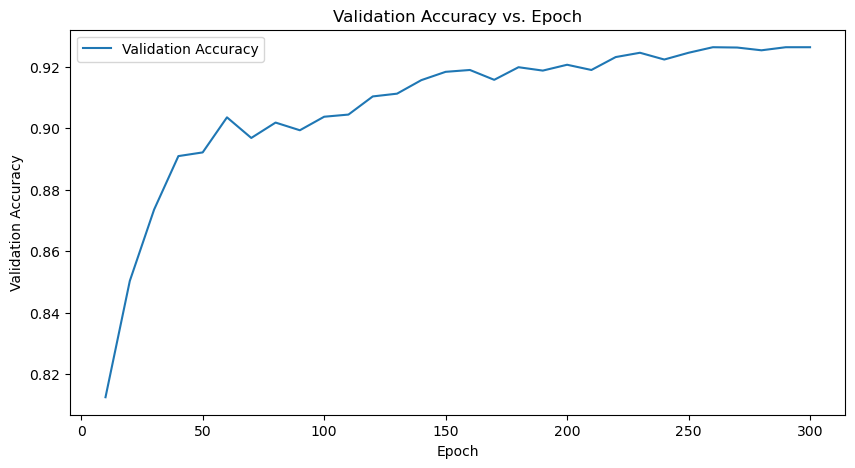

Total training time: 3.4 h
Epoch 1 time: 37.58s
Epoch 2 time: 37.41s
Epoch 3 time: 37.40s
Epoch 4 time: 37.52s
Epoch 5 time: 37.03s
Epoch 6 time: 37.41s
Epoch 7 time: 38.06s
Epoch 8 time: 37.95s
Epoch 9 time: 38.36s
Epoch 10: Train Loss: 3.8807, Train Accu: 0.8451, Test Loss: 0.5609, Test Accu: 0.8142
[After Dropping Off-Diagonal Entries] Epoch 10: Test Loss: 0.5615, Test Accu: 0.8140
Epoch 10 time: 60.08s
Epoch 11 time: 37.71s
Epoch 12 time: 37.26s
Epoch 13 time: 37.55s
Epoch 14 time: 38.11s
Epoch 15 time: 37.11s
Epoch 16 time: 36.99s
Epoch 17 time: 37.27s
Epoch 18 time: 37.76s
Epoch 19 time: 36.89s
Epoch 20: Train Loss: 3.6285, Train Accu: 0.9181, Test Loss: 0.4587, Test Accu: 0.8555
[After Dropping Off-Diagonal Entries] Epoch 20: Test Loss: 0.4594, Test Accu: 0.8551
Epoch 20 time: 58.98s
Epoch 21 time: 37.33s
Epoch 22 time: 37.94s
Epoch 23 time: 37.43s
Epoch 24 time: 37.42s
Epoch 25 time: 37.33s
Epoch 26 time: 37.45s
Epoch 27 time: 37.58s
Epoch 28 time: 37.28s
Epoch 29 time: 37.55s


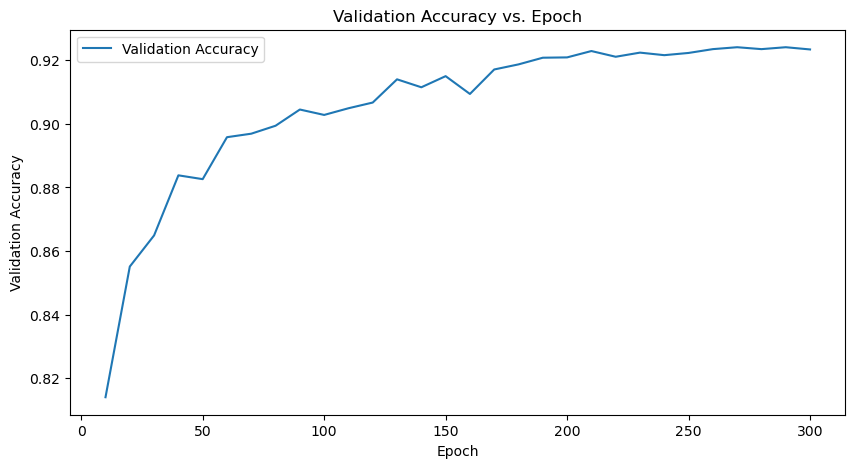

Total training time: 3.3 h
Epoch 1 time: 37.12s
Epoch 2 time: 36.98s
Epoch 3 time: 37.15s
Epoch 4 time: 37.42s
Epoch 5 time: 37.16s
Epoch 6 time: 37.16s
Epoch 7 time: 37.16s
Epoch 8 time: 37.05s
Epoch 9 time: 37.13s
Epoch 10: Train Loss: 3.8967, Train Accu: 0.8373, Test Loss: 0.6158, Test Accu: 0.7974
[After Dropping Off-Diagonal Entries] Epoch 10: Test Loss: 0.6154, Test Accu: 0.7977
Epoch 10 time: 58.99s
Epoch 11 time: 37.23s
Epoch 12 time: 37.39s
Epoch 13 time: 37.18s
Epoch 14 time: 37.00s
Epoch 15 time: 37.36s
Epoch 16 time: 37.25s
Epoch 17 time: 36.91s
Epoch 18 time: 36.99s
Epoch 19 time: 37.04s
Epoch 20: Train Loss: 3.6403, Train Accu: 0.9145, Test Loss: 0.4831, Test Accu: 0.8500
[After Dropping Off-Diagonal Entries] Epoch 20: Test Loss: 0.4817, Test Accu: 0.8500
Epoch 20 time: 58.98s
Epoch 21 time: 37.17s
Epoch 22 time: 37.20s
Epoch 23 time: 36.82s
Epoch 24 time: 37.35s
Epoch 25 time: 37.20s
Epoch 26 time: 37.23s
Epoch 27 time: 37.12s
Epoch 28 time: 37.21s
Epoch 29 time: 36.98s


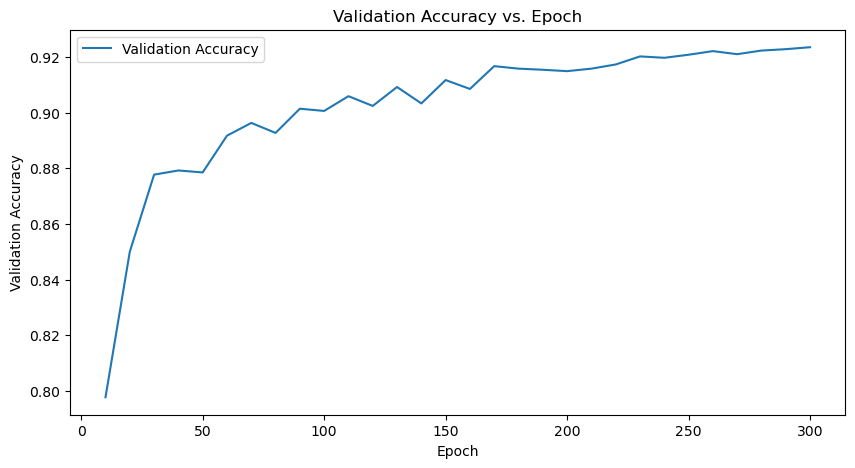

Total training time: 3.3 h
Epoch 1 time: 37.35s
Epoch 2 time: 37.19s
Epoch 3 time: 37.17s
Epoch 4 time: 37.52s
Epoch 5 time: 37.30s
Epoch 6 time: 37.36s
Epoch 7 time: 37.00s
Epoch 8 time: 37.44s
Epoch 9 time: 36.96s
Epoch 10: Train Loss: 3.9066, Train Accu: 0.8323, Test Loss: 0.6171, Test Accu: 0.7987
[After Dropping Off-Diagonal Entries] Epoch 10: Test Loss: 0.6193, Test Accu: 0.7977
Epoch 10 time: 59.51s
Epoch 11 time: 37.27s
Epoch 12 time: 37.16s
Epoch 13 time: 37.39s
Epoch 14 time: 37.19s
Epoch 15 time: 37.38s
Epoch 16 time: 37.17s
Epoch 17 time: 37.19s
Epoch 18 time: 37.18s
Epoch 19 time: 37.57s
Epoch 20: Train Loss: 3.6211, Train Accu: 0.9144, Test Loss: 0.4954, Test Accu: 0.8474
[After Dropping Off-Diagonal Entries] Epoch 20: Test Loss: 0.4969, Test Accu: 0.8469
Epoch 20 time: 60.02s
Epoch 21 time: 37.72s
Epoch 22 time: 37.59s
Epoch 23 time: 37.83s
Epoch 24 time: 38.23s
Epoch 25 time: 38.16s
Epoch 26 time: 38.71s
Epoch 27 time: 38.15s
Epoch 28 time: 38.59s
Epoch 29 time: 37.89s


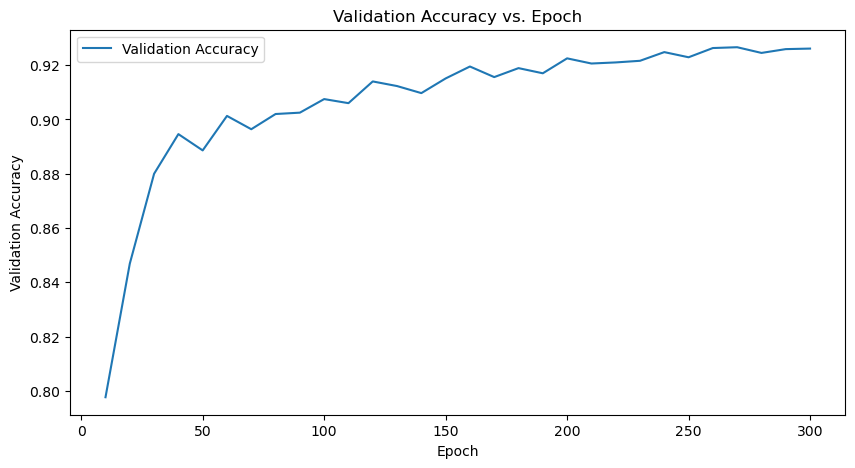

Total training time: 3.3 h
Epoch 1 time: 36.99s
Epoch 2 time: 37.09s
Epoch 3 time: 37.08s
Epoch 4 time: 36.80s
Epoch 5 time: 36.97s
Epoch 6 time: 37.01s
Epoch 7 time: 36.93s
Epoch 8 time: 37.04s
Epoch 9 time: 36.80s
Epoch 10: Train Loss: 3.9054, Train Accu: 0.8342, Test Loss: 0.6135, Test Accu: 0.7953
[After Dropping Off-Diagonal Entries] Epoch 10: Test Loss: 0.6152, Test Accu: 0.7949
Epoch 10 time: 59.60s
Epoch 11 time: 37.18s
Epoch 12 time: 37.02s
Epoch 13 time: 36.95s
Epoch 14 time: 36.76s
Epoch 15 time: 37.05s
Epoch 16 time: 36.97s
Epoch 17 time: 37.01s
Epoch 18 time: 37.07s
Epoch 19 time: 38.01s
Epoch 20: Train Loss: 3.6477, Train Accu: 0.9110, Test Loss: 0.4541, Test Accu: 0.8557
[After Dropping Off-Diagonal Entries] Epoch 20: Test Loss: 0.4545, Test Accu: 0.8560
Epoch 20 time: 61.05s
Epoch 21 time: 37.72s
Epoch 22 time: 37.66s
Epoch 23 time: 37.54s
Epoch 24 time: 37.85s
Epoch 25 time: 37.50s
Epoch 26 time: 37.57s
Epoch 27 time: 37.52s
Epoch 28 time: 37.16s
Epoch 29 time: 37.49s


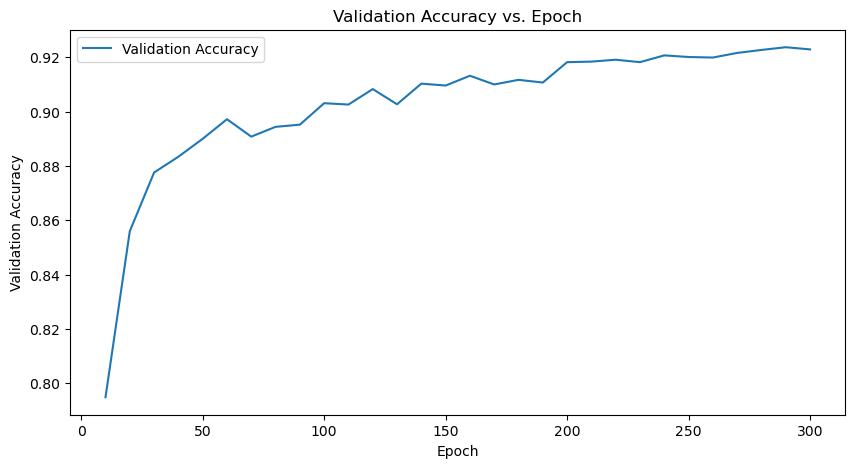

Total training time: 3.3 h
Epoch 1 time: 37.80s
Epoch 2 time: 37.64s
Epoch 3 time: 37.59s
Epoch 4 time: 37.75s
Epoch 5 time: 37.56s
Epoch 6 time: 37.86s
Epoch 7 time: 37.51s
Epoch 8 time: 37.59s
Epoch 9 time: 37.63s
Epoch 10: Train Loss: 3.8925, Train Accu: 0.8407, Test Loss: 0.5583, Test Accu: 0.8155
[After Dropping Off-Diagonal Entries] Epoch 10: Test Loss: 0.5579, Test Accu: 0.8155
Epoch 10 time: 60.22s
Epoch 11 time: 37.74s
Epoch 12 time: 37.67s
Epoch 13 time: 37.88s
Epoch 14 time: 37.63s
Epoch 15 time: 37.77s
Epoch 16 time: 37.62s
Epoch 17 time: 37.55s
Epoch 18 time: 37.40s
Epoch 19 time: 37.61s
Epoch 20: Train Loss: 3.6529, Train Accu: 0.9137, Test Loss: 0.5086, Test Accu: 0.8424
[After Dropping Off-Diagonal Entries] Epoch 20: Test Loss: 0.5100, Test Accu: 0.8415
Epoch 20 time: 60.04s
Epoch 21 time: 37.73s
Epoch 22 time: 37.55s
Epoch 23 time: 37.63s
Epoch 24 time: 37.58s
Epoch 25 time: 37.77s
Epoch 26 time: 37.86s
Epoch 27 time: 37.36s
Epoch 28 time: 37.61s
Epoch 29 time: 37.57s


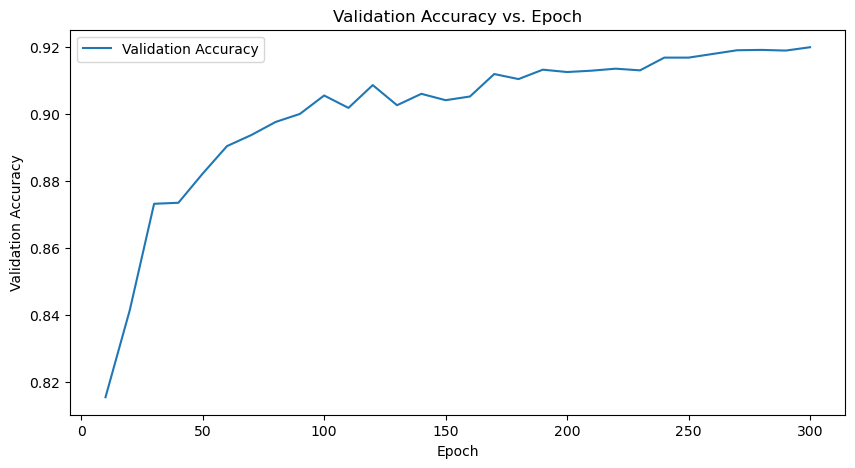

Total training time: 3.3 h
Epoch 1 time: 38.03s
Epoch 2 time: 37.94s
Epoch 3 time: 37.69s
Epoch 4 time: 37.71s
Epoch 5 time: 37.60s
Epoch 6 time: 39.04s
Epoch 7 time: 39.55s
Epoch 8 time: 39.32s
Epoch 9 time: 39.16s
Epoch 10: Train Loss: 3.8872, Train Accu: 0.8391, Test Loss: 0.5700, Test Accu: 0.8091
[After Dropping Off-Diagonal Entries] Epoch 10: Test Loss: 0.5716, Test Accu: 0.8078
Epoch 10 time: 61.73s
Epoch 11 time: 38.82s
Epoch 12 time: 39.02s
Epoch 13 time: 38.96s
Epoch 14 time: 39.00s
Epoch 15 time: 39.22s
Epoch 16 time: 39.14s
Epoch 17 time: 38.80s
Epoch 18 time: 38.98s
Epoch 19 time: 39.23s
Epoch 20: Train Loss: 3.6309, Train Accu: 0.9144, Test Loss: 0.4353, Test Accu: 0.8606
[After Dropping Off-Diagonal Entries] Epoch 20: Test Loss: 0.4356, Test Accu: 0.8605
Epoch 20 time: 62.12s
Epoch 21 time: 38.60s
Epoch 22 time: 38.97s
Epoch 23 time: 39.02s
Epoch 24 time: 39.04s
Epoch 25 time: 38.99s
Epoch 26 time: 39.11s
Epoch 27 time: 38.80s
Epoch 28 time: 39.19s
Epoch 29 time: 38.77s


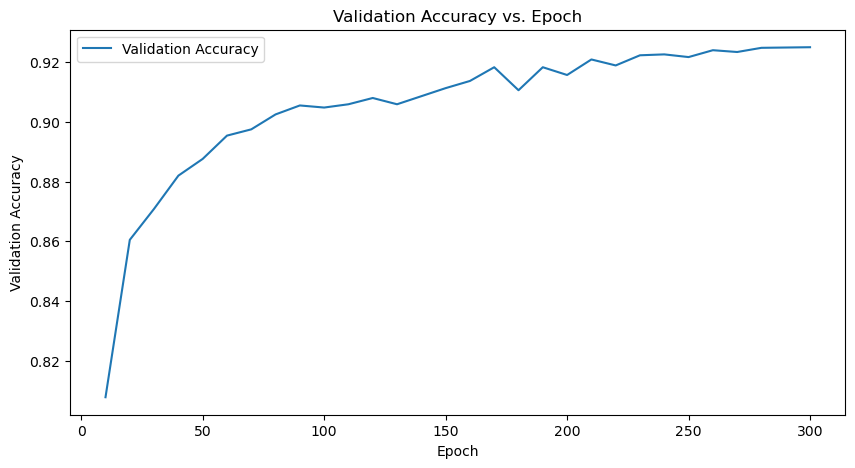

Total training time: 3.4 h
Epoch 1 time: 38.00s
Epoch 2 time: 38.10s
Epoch 3 time: 38.07s
Epoch 4 time: 38.17s
Epoch 5 time: 38.20s
Epoch 6 time: 38.17s
Epoch 7 time: 37.96s
Epoch 8 time: 37.83s
Epoch 9 time: 38.14s
Epoch 10: Train Loss: 3.8740, Train Accu: 0.8454, Test Loss: 0.6739, Test Accu: 0.7902
[After Dropping Off-Diagonal Entries] Epoch 10: Test Loss: 0.6747, Test Accu: 0.7904
Epoch 10 time: 60.18s
Epoch 11 time: 37.17s
Epoch 12 time: 36.81s
Epoch 13 time: 36.89s
Epoch 14 time: 36.89s
Epoch 15 time: 36.94s
Epoch 16 time: 37.44s
Epoch 17 time: 36.93s
Epoch 18 time: 37.02s
Epoch 19 time: 37.23s
Epoch 20: Train Loss: 3.6245, Train Accu: 0.9168, Test Loss: 0.4758, Test Accu: 0.8559
[After Dropping Off-Diagonal Entries] Epoch 20: Test Loss: 0.4768, Test Accu: 0.8551
Epoch 20 time: 59.11s
Epoch 21 time: 37.18s
Epoch 22 time: 37.23s
Epoch 23 time: 37.18s
Epoch 24 time: 37.00s
Epoch 25 time: 37.13s
Epoch 26 time: 37.08s
Epoch 27 time: 37.17s
Epoch 28 time: 37.17s
Epoch 29 time: 37.15s


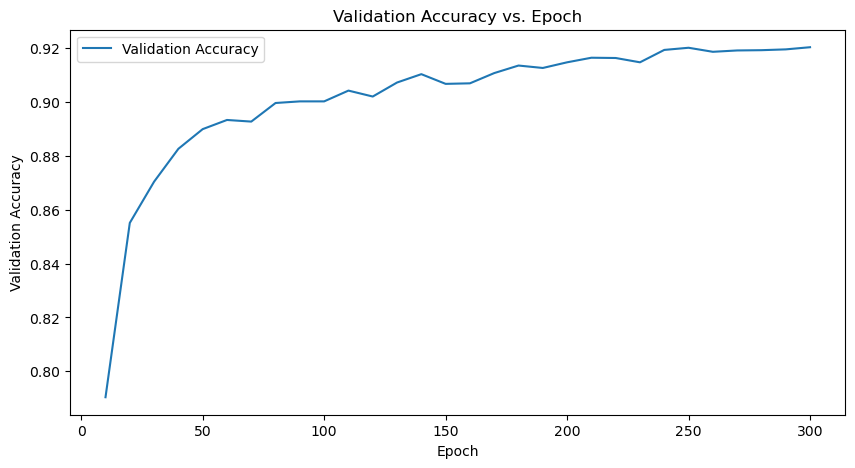

Total training time: 3.2 h


In [9]:
EST_time_zone = pytz.timezone('US/Eastern')


df_path = './bloc_diag_MobileNetV2__test_results__dataset=CIFAR-10.csv'
model_folder_dir = './bloc_diag_MobileNetV2__models'
if os.path.exists(df_path):
    df_results = pd.read_csv(df_path)
else:
    df_results = pd.DataFrame()


# load data
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding = 4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

train_CIFAR10 = CIFAR10("/home/tinyalpha/dataset/cifar10", transform = transform_train, train=True, download=True)
test_CIFAR10 = CIFAR10("/home/tinyalpha/dataset/cifar10", transform = transform_test, train=False, download=True)
train_loader = torch.utils.data.DataLoader(train_CIFAR10, batch_size = config['train_loader_batch_size'], shuffle = True, num_workers = 6)
test_loader = torch.utils.data.DataLoader(test_CIFAR10, batch_size = 192, shuffle = False, num_workers = 6)


for rand_seed in list_rand_seeds:
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)

    start_time = time.time()

    row_blocks, col_blocks = translate_nonzero_blocks(config['nonzero_blocks'])
    model = MobileNetV2(config['layer_sizes'], row_blocks, col_blocks, config['fc_if_bias'], config['fc_nonlinear_activation'], alpha=1)
    model.to(device)
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.AdamW(model.parameters(), lr=config['starting_learning_rate'], weight_decay=config['weight_decay'])
    if config['scheduler'] == 'cosine annealing':
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=config['T_max'], eta_min=config['eta_min'])
    else:
        raise ValueError("scheduler is unspecified")


    test_accuracies = []
    test_accuracies_off_diag_dropped = []


    for epoch in range(config['stopping_epoch']):
        epoch_start_time = time.time()

        # Initialize metrics
        correct, total, train_loss, counter = 0, 0, 0, 0
    
        # Training loop
        for data in train_loader:
            model.train()
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
    
            # Forward pass and loss calculation
            outputs = model(inputs)
            if config['multiplier_off_diag_loss'] == 0:
                loss = criterion(outputs, labels)
            else:
                off_diag_loss = model.get_off_diag_loss(device)
                loss = criterion(outputs, labels) + config['multiplier_off_diag_loss']*off_diag_loss
    
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            # Update training metrics
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            train_loss += loss.item()
            counter += 1
    
        # Evaluate on the test set every 10 epochs
        if (epoch + 1) % 10 == 0:
            train_accuracy = correct / total
            avg_train_loss = train_loss / counter
            test_loss, test_accuracy_before_dropping = test(model, test_loader, criterion, device)
            test_accuracies.append(test_accuracy_before_dropping)
    
            # Print and optionally log the metrics
            print(f'Epoch {epoch + 1}: Train Loss: {avg_train_loss:.4f}, Train Accu: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accu: {test_accuracy_before_dropping:.4f}')

            if config['multiplier_off_diag_loss'] != 0:
                # Evaluate and print metrics for model with dropped off-diagonal entries
                model_off_diag_dropped = model.copy_model_drop_off_diag(device)
                test_loss_od_dropped, test_accuracy_off_diag_dropped = test(model_off_diag_dropped, test_loader, criterion, device)
                test_accuracies_off_diag_dropped.append(test_accuracy_off_diag_dropped)
                
                print(f'[After Dropping Off-Diagonal Entries] Epoch {epoch + 1}: Test Loss: {test_loss_od_dropped:.4f}, Test Accu: {test_accuracy_off_diag_dropped:.4f}')
            else:
                # when config['multiplier_off_diag_loss'] == 0, no block-diagonalization
                test_loss_od_dropped, test_accuracy_off_diag_dropped = test_loss, test_accuracy_before_dropping
                test_accuracies_off_diag_dropped.append(test_accuracy_off_diag_dropped)

        scheduler.step()
        # Report epoch duration
        print("Epoch {} time: {:.2f}s".format(epoch + 1, time.time() - epoch_start_time))



    current_time_est = datetime.datetime.now(EST_time_zone)
    time_str = current_time_est.strftime("%Y-%m-%d_%H-%M-%S")

    ### save the model
    torch.save(model.state_dict(), f"{model_folder_dir}/{config['model_name']}__data={config['dataset_name']}__{config['config_name']}__{time_str}.pt")
    torch.save(optimizer.state_dict(), f"{model_folder_dir}/optimizer__{config['model_name']}__data={config['dataset_name']}__{config['config_name']}__{time_str}.pt")

    end_time = time.time()
    print(f'Time consumption: {end_time - start_time}')
    
    dict_to_save = copy.deepcopy(config)

    dict_to_save['random_seed'] = rand_seed
    dict_to_save['time'] = time_str
    dict_to_save['train_accuracy'] = train_accuracy
    dict_to_save['test_accuracy_before_dropping'] = test_accuracy_before_dropping
    dict_to_save['test_accuracy_off_diag_dropped'] = test_accuracy_off_diag_dropped
    dict_to_save['time_consumption(s)'] = end_time - start_time

    ### save result to spreadsheet
    df_results = pd.concat([df_results, pd.DataFrame([dict_to_save])], ignore_index=True)
    df_results.to_csv(df_path, index=False)



    plt.figure(figsize=(10, 5))
    if config['multiplier_off_diag_loss'] != 0:
        plt.plot(list(range(10, config['stopping_epoch']+1, 10)), test_accuracies_off_diag_dropped, label='Validation Accuracy')
    else:
        plt.plot(list(range(10, config['stopping_epoch']+1, 10)), test_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy vs. Epoch')
    plt.legend()
    plt.show()

    
    print("Total training time: {:.1f} h".format((time.time() - start_time) / 3600))

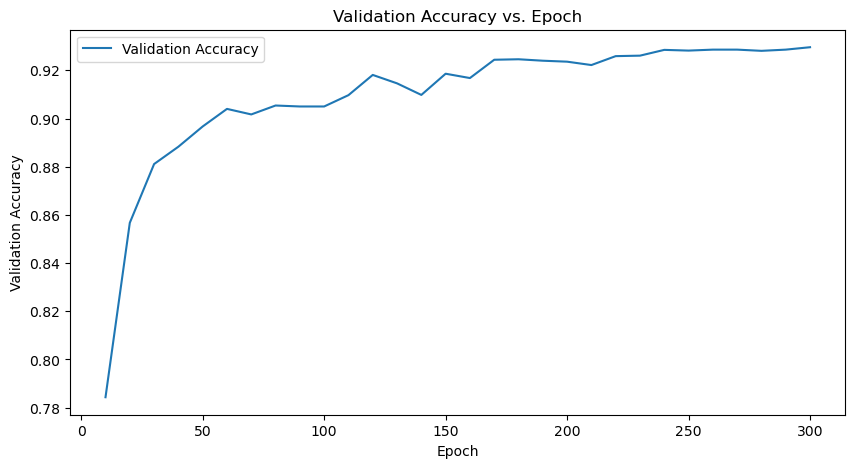

In [8]:
plt.figure(figsize=(10, 5))
if config['multiplier_off_diag_loss'] != 0:
    plt.plot(list(range(10, config['T_max']+1, 10)), test_accuracies_off_diag_dropped, label='Validation Accuracy')
else:
    plt.plot(list(range(10, config['T_max']+1, 10)), test_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epoch')
plt.legend()
plt.show()